<a href="https://colab.research.google.com/github/Vothuw/homeworkAl/blob/main/2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.7 MB/s eta 0:00:00


nguy cơ bị tiểu đường:59.99999999999998%


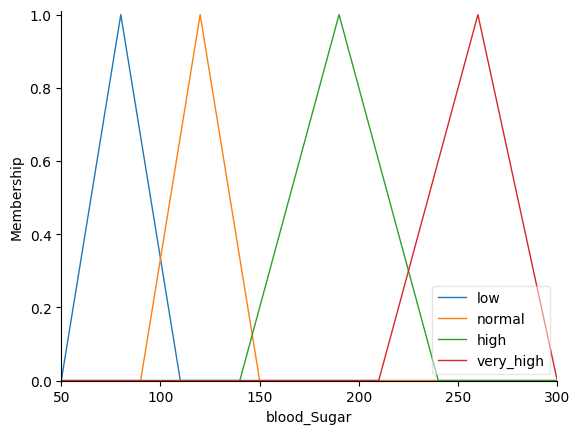

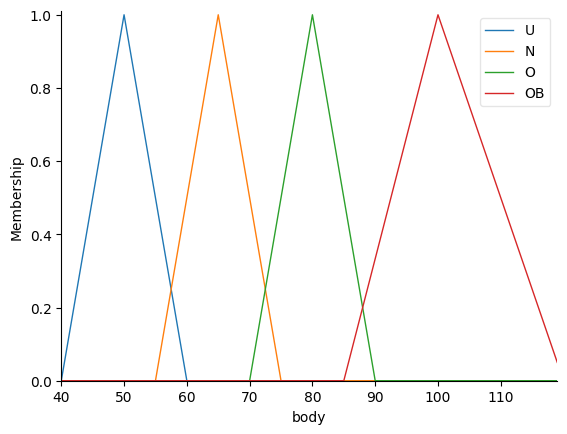

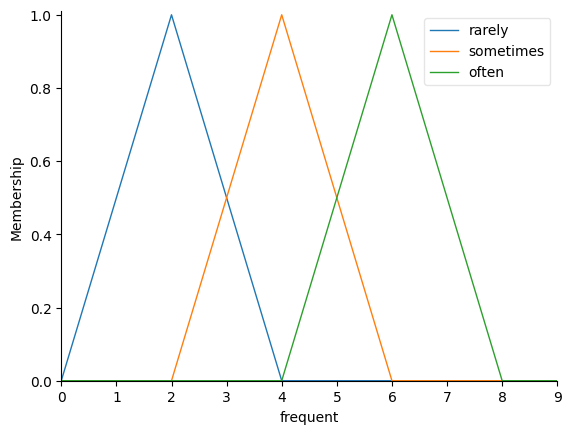

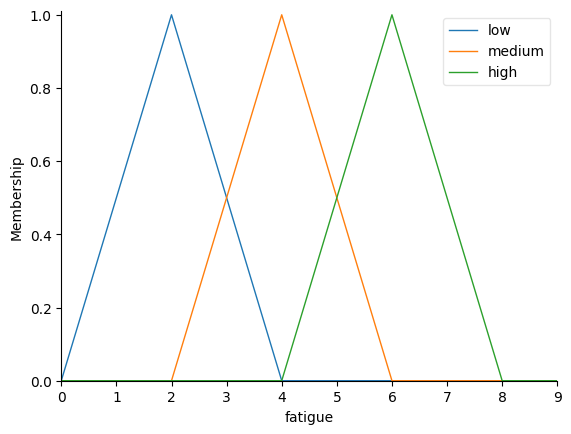

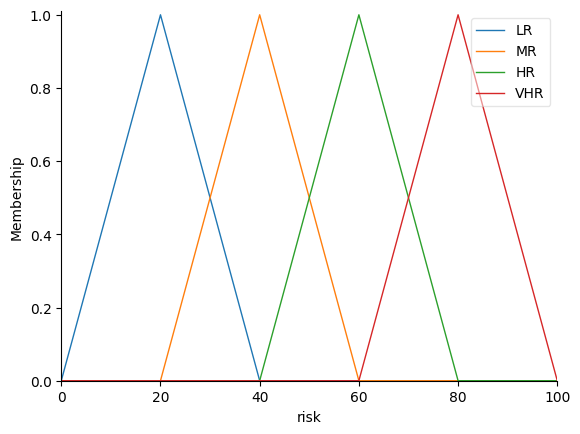

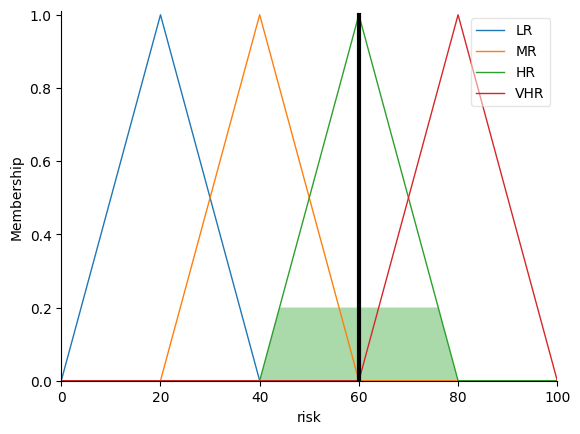

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

blood_Sugar=ctrl.Antecedent(np.arange(50,301,1),'blood_Sugar')
body=ctrl.Antecedent(np.arange(40,120,1),'body')
frequent=ctrl.Antecedent(np.arange(0,10,1),'frequent')
fatigue=ctrl.Antecedent(np.arange(0,10,1),'fatigue')

risk=ctrl.Consequent(np.arange(0,101,1),'risk')

blood_Sugar['low']=fuzz.trimf(blood_Sugar.universe,[50,80,110])
blood_Sugar['normal']=fuzz.trimf(blood_Sugar.universe,[90,120,150])
blood_Sugar['high']=fuzz.trimf(blood_Sugar.universe,[140,190,240])
blood_Sugar['very_high']=fuzz.trimf(blood_Sugar.universe,[210,260,300])


body['U']=fuzz.trimf(body.universe,[40,50,60])
body['N']=fuzz.trimf(body.universe,[55,65,75])
body['O']=fuzz.trimf(body.universe,[70,80,90])
body['OB']=fuzz.trimf(body.universe,[85,100,120])


frequent['rarely']=fuzz.trimf(frequent.universe,[0,2,4])
frequent['sometimes']=fuzz.trimf(frequent.universe,[2,4,6])
frequent['often']=fuzz.trimf(frequent.universe,[4,6,8])


fatigue['low']=fuzz.trimf(fatigue.universe,[0,2,4])
fatigue['medium']=fuzz.trimf(fatigue.universe,[2,4,6])
fatigue['high']=fuzz.trimf(fatigue.universe,[4,6,8])


risk['LR']=fuzz.trimf(risk.universe,[0,20,40])
risk['MR']=fuzz.trimf(risk.universe,[20,40,60])
risk['HR']=fuzz.trimf(risk.universe,[40,60,80])
risk['VHR']=fuzz.trimf(risk.universe,[60,80,100])

blood_Sugar.view()
body.view()
frequent.view()
fatigue.view()
risk.view()

rule1=ctrl.Rule(blood_Sugar['very_high']&frequent['often'],risk['VHR'])
rule2=ctrl.Rule(blood_Sugar['very_high']&frequent['sometimes'],risk['HR'])
rule3=ctrl.Rule(blood_Sugar['high']&frequent['often'],risk['HR'])
rule4=ctrl.Rule(blood_Sugar['normal']&frequent['rarely'],risk['LR'])

rule5=ctrl.Rule(blood_Sugar['very_high']&body['OB'],risk['HR'])
rule6=ctrl.Rule(blood_Sugar['very_high']&body['O'],risk['HR'])
rule7=ctrl.Rule(blood_Sugar['high']&body['OB'],risk['HR'])
rule8=ctrl.Rule(blood_Sugar['high']&body['O'],risk['MR'])
rule9=ctrl.Rule(blood_Sugar['normal']&body['N'],risk['LR'])

rule10=ctrl.Rule(blood_Sugar['very_high']&fatigue['high'],risk['VHR'])
rule11=ctrl.Rule(blood_Sugar['high']&fatigue['high'],risk['HR'])
rule12=ctrl.Rule(blood_Sugar['high']&fatigue['medium'],risk['MR'])
rule13=ctrl.Rule(blood_Sugar['normal']&fatigue['low'],risk['LR'])

rating_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
rating=ctrl.ControlSystemSimulation(rating_ctrl)
rating.input['blood_Sugar']=150
rating.input['body']=28
rating.input['frequent']=7
rating.input['fatigue']=6
rating.compute()
print(f"nguy cơ bị tiểu đường:{rating.output['risk']}%")
risk.view(sim=rating)